In [1]:
with open('sowpods.txt', 'r') as Words:
    string = Words.read()
    sowpods = (string.split('\n'))
    sowpods.remove('')
    sowpods = {str(i) for i in sowpods if len(i) <= 9}
#converts the SOWPODS scrabble dictionary into a list

In [2]:
def powerset(iterable):
    """
    This is a modification of the recipe available here: 
    https://docs.python.org/3/library/itertools.html#itertools-recipes
    
    Note that the main modification is to ensure the order is of the longest subset first:
    
    powerset([1,2,3]) --> (1,2,3) (1, 2) (1, 3) (2, 3) (1,) (2,) (3,)"
    """
    s = list(iterable)
    return itertools.chain.from_iterable(itertools.combinations(s, r) for r in range(len(s)+1, 1, -1))

def func(x, a, b, c):
    return a * x ** 2 + b * x + c

In [3]:
import random
import itertools 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#lists of alphabet categorised for board creation
vowels = 'aeiou'
consonants = 'bcdfghjklmnpqrstvwxyz'

#turning the dictionary into 
dictionary = set([tuple(sorted(word)) for word in sowpods])


def solve_board(vowel_number, 
                display_board=False,
                dictionary=dictionary,
                board_size=9,
                vowels=vowels,
                consonants=consonants):
    '''creates a countdown board of 9 letters and returns the largest word present'''
    board = []
    length = [0]

    #randomly generates the board
    board = list(np.random.choice(list(vowels), vowel_number, replace=True))
    board += list(np.random.choice(list(consonants), board_size - vowel_number, replace=True))
    if display_board is True:
        print(board)
            
    #checks for words that can be created using the board letters,
    #returns the maximum word length possible
    sorted_board = tuple(sorted(board))
    
    for subset in powerset(sorted_board):
        if subset in dictionary:
            return subset
    return ([])

In [4]:
solve_board(3, True)

['e', 'i', 'o', 'q', 'd', 'c', 'k', 'x', 'z']


('c', 'd', 'e', 'i', 'k', 'o', 'z')

In [5]:
averages = []
for v in range (0, 10):
    highest = []
    for _ in range (0, 50000):
        highest.append(len(solve_board(v)))        
    averages.append(sum(highest) / len(highest))

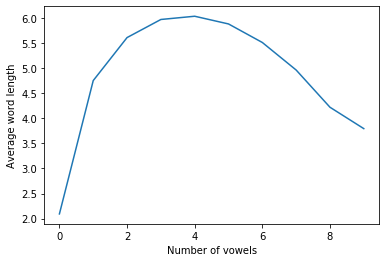

In [6]:
%matplotlib inline

index = [i for i in range(len(averages))]
plt.figure()
plt.plot(index, averages)
plt.xlabel("Number of vowels")
plt.ylabel("Average word length")
plt.savefig("english.png")

In [7]:
averages

[2.09286,
 4.75418,
 5.61234,
 5.9735,
 6.03812,
 5.8843,
 5.51436,
 4.9648,
 4.22198,
 3.79524]

In [8]:
with open('francais.txt', 'r') as Words:
    string = Words.read()
    francais = (string.split('\n'))
    francais.remove('')
    francais = {str(i) for i in francais if len(i) <= 10}
#converts the french scrabble dictionary into a list
dictionnaire = set([tuple(sorted(word)) for word in francais])

In [9]:
fr_averages = []
for v in range (0, 10):
    fr_highest = [] 
    for _ in range (0, 50000):
        fr_highest.append(len(solve_board(v, False, dictionnaire, 10)))        
    fr_averages.append(sum(fr_highest) / len(fr_highest))
    fr_highest = [] 
for _ in range (0, 50000):
    fr_highest.append(len(solve_board(10, False, dictionnaire, 10)))
fr_averages_10 = fr_averages + [(sum(fr_highest) / len(fr_highest))]

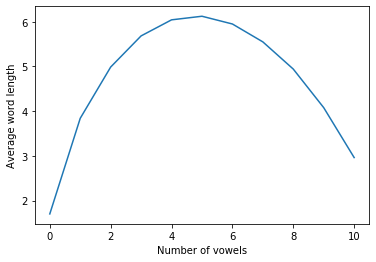

In [10]:
%matplotlib inline

fr_index = [i for i in range(len(fr_averages_10))]
plt.figure()
plt.plot(fr_index, fr_averages_10)
plt.xlabel("Number of vowels")
plt.ylabel("Average word length")
plt.savefig("francais.png")

In [11]:
with open('deutsch.txt', 'r') as Words:
    string = Words.read()
    deutsch = (string.split('\n'))
    deutsch.remove('')
    deutsch = {str(i) for i in deutsch if len(i) <= 9}
#converts the french scrabble dictionary into a list
lexikon = set([tuple(sorted(word)) for word in deutsch])

In [12]:
de_averages = [] 
for v in range (0, 10):
    de_highest = []
    for _ in range (0, 50000):
        de_highest.append(len(solve_board(v, False, lexikon)))        
    de_averages.append(sum(de_highest) / len(de_highest))

In [13]:
solve_board(3, False, dictionnaire, 10)

('d', 'e', 'g', 'o', 'u')

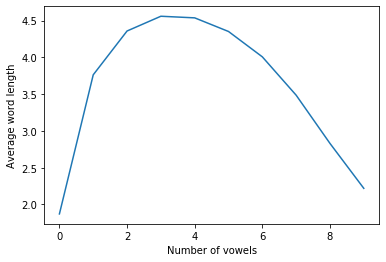

In [14]:
%matplotlib inline

de_index = [i for i in range(len(de_averages))]
plt.figure()
plt.plot(de_index, de_averages)
plt.xlabel("Number of vowels")
plt.ylabel("Average word length")
plt.savefig("deutsch.png")

In [30]:
df = pd.DataFrame({'English' : averages, 'French': fr_averages, 'German': de_averages})

In [16]:
df

,English,French,German
0,2.09286,1.70240,1.87128
1,4.75418,3.84076,3.76254
2,5.61234,4.98730,4.35810
3,5.97350,5.68438,4.55872
4,6.03812,6.04348,4.53678
5,5.88430,6.12396,4.35144
6,5.51436,5.95054,4.00674
7,4.96480,5.55032,3.48556
8,4.22198,4.94196,2.82998
9,3.79524,4.07896,2.21908


In [17]:
from scipy import optimize

In [18]:
de_popt, de_pcov = optimize.curve_fit(func, index, de_averages)

In [19]:
de_popt

array([-0.11880955,  1.01109379,  2.434172  ])

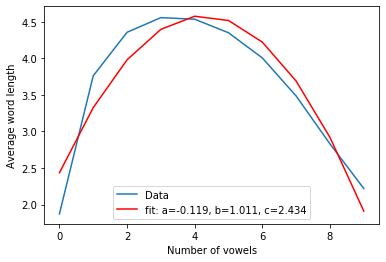

In [20]:
de_fitted_ys = [func(x, *de_popt) for x in de_index]
plt.plot(de_index, de_averages, label="Data")
plt.plot(de_index, de_fitted_ys, label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(de_popt), color="red")
plt.xlabel("Number of vowels")
plt.ylabel("Average word length")
plt.legend()
plt.savefig("deutsch-fitted.png")

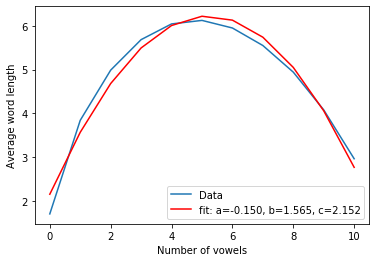

In [21]:
fr_popt, fr_pcov = optimize.curve_fit(func, fr_index, fr_averages_10)
fr_fitted_ys = [func(x, *fr_popt) for x in fr_index]
plt.plot(fr_index, fr_averages_10, label="Data")
plt.plot(fr_index, fr_fitted_ys, label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(fr_popt), color="red")
plt.xlabel("Number of vowels")
plt.ylabel("Average word length")
plt.legend()
plt.savefig("francais-fitted.png")

In [22]:
fr_popt

array([-0.15037963,  1.56523372,  2.15229469])

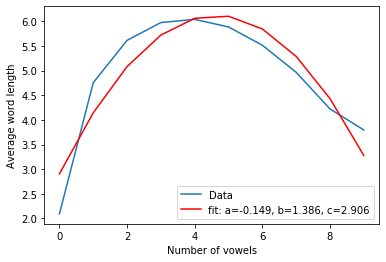

In [23]:
popt, pcov = optimize.curve_fit(func, index, averages)
fitted_ys = [func(x, *popt) for x in index]
plt.plot(index, averages, label="Data")
plt.plot(index, fitted_ys, label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt), color="red")
plt.xlabel("Number of vowels")
plt.ylabel("Average word length")
plt.legend()
plt.savefig("english-fitted.png")

In [24]:
popt

array([-0.14942985,  1.38624488,  2.90581673])

In [26]:
df.to_csv (r'C:\Users\alexr\Desktop\dataframe.csv', index = True, header=True)

In [29]:
rawdata = pd.DataFrame({'English' : highest, 'French': fr_highest, 'German': de_highest})

In [31]:
rawdata.to_csv (r'C:\Users\alexr\Desktop\dataframe.csv', index = True, header=True)